In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns 

In [2]:
# Load the data
data = pd.read_csv('100.csv')


In [3]:
m = data.shape[0]
n = data.shape[1]
print('Number of rows: ', m)
print('Number of columns: ', n)


Number of rows:  650000
Number of columns:  3


In [4]:
# Plot the data
columns = data.columns
print(columns)


Index([''sample #'', ''MLII'', ''V5''], dtype='object')


In [5]:
mean1 = np.mean(data[columns[1]])
mean2 = np.mean(data[columns[2]])

var1 = np.var(data[columns[1]])
var2 = np.var(data[columns[2]])

std1 = np.std(data[columns[1]])
std2 = np.std(data[columns[2]])

print('Mean: ', mean1)
print('Variance: ', var1)
print('Standard deviation: ', std1)

print('Mean: ', mean2)
print('Variance: ', var2)
print('Standard deviation: ', std2)


Mean:  962.7402046153846
Variance:  1493.0425232812097
Standard deviation:  38.63990842744338
Mean:  985.7931138461538
Variance:  878.6863950424238
Standard deviation:  29.642644872588946


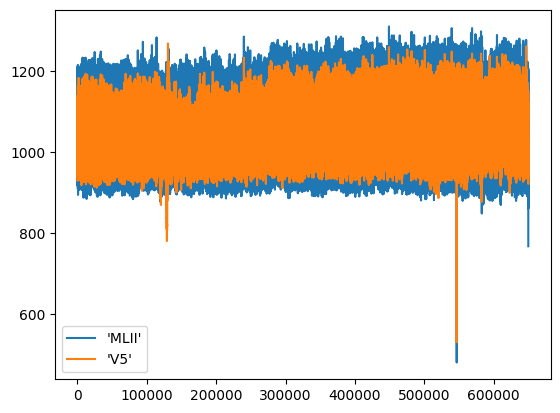

In [6]:
for i in range(1, n):
    plt.plot(data[columns[0]], data[columns[i]], label=columns[i])
plt.legend()


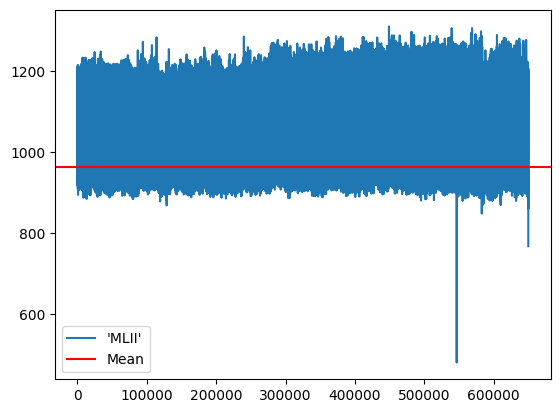

In [7]:
plt.plot(data[columns[0]], data[columns[1]], label=columns[1])
plt.axhline(y=mean1, color='r', linestyle='-', label='Mean')
plt.legend()


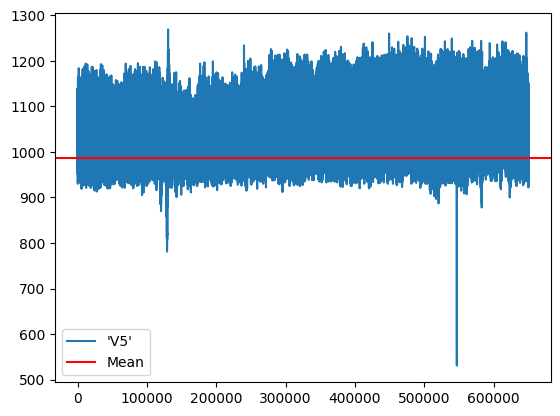

In [8]:
plt.plot(data[columns[0]], data[columns[2]], label=columns[2])
plt.axhline(y=mean2, color='r', linestyle='-', label='Mean')
plt.legend()


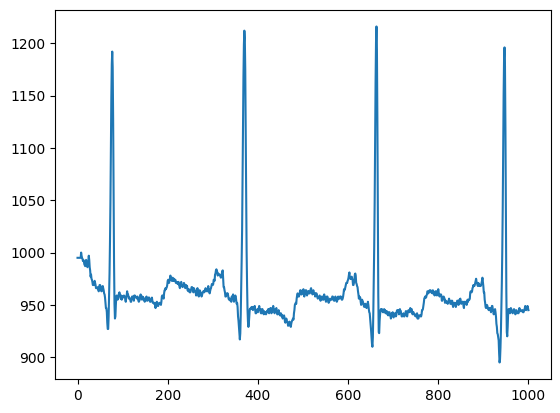

In [9]:
subset_data = data[columns[1]].loc[0:1000]
plt.figure()
plt.plot(subset_data, label=columns[1])


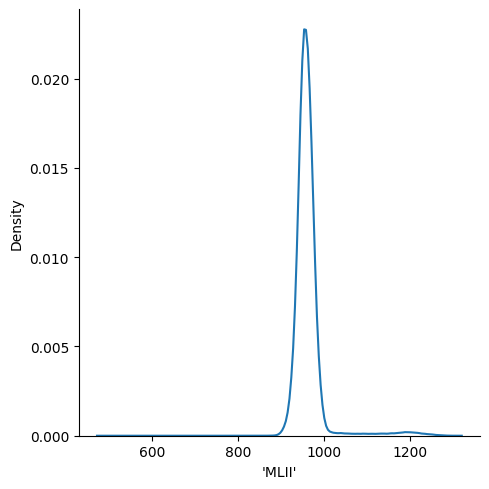

In [10]:
sns.displot(data[columns[1]],kind='kde')

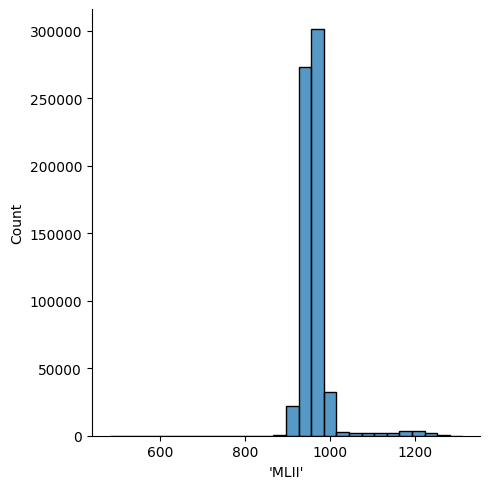

In [11]:
sns.displot(data[columns[1]], binwidth=30)

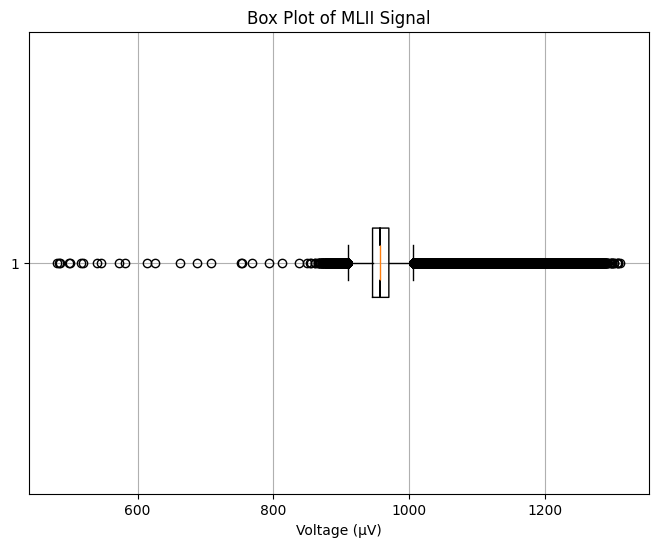

In [12]:
plt.figure(figsize=(8, 6))
plt.boxplot(data[columns[1]], notch=True, vert=False)
plt.title('Box Plot of MLII Signal')
plt.xlabel('Voltage (µV)')
plt.grid(True)
plt.show()

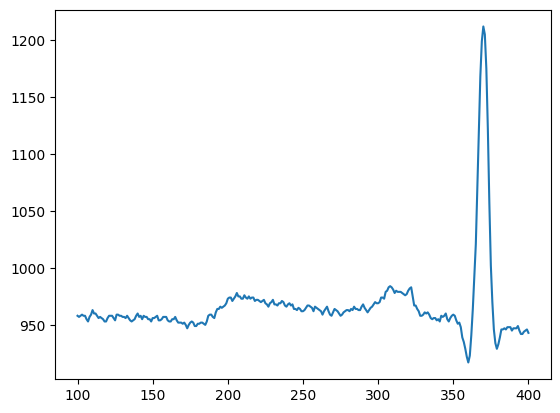

In [13]:
subset_data = data[columns[1]].loc[50:400]
plt.figure()
plt.plot(subset_data, label=columns[1])


In [14]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c')
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [15]:
adf_test(data[columns[1]].loc[100:10000])
kpss_test(data[columns[1]].loc[100:10000])


Results of Dickey-Fuller Test:
Test Statistic                -1.420240e+01
p-value                        1.778475e-26
#Lags Used                     3.800000e+01
Number of Observations Used    9.862000e+03
Critical Value (1%)           -3.431013e+00
Critical Value (5%)           -2.861833e+00
Critical Value (10%)          -2.566926e+00
dtype: float64
Results of KPSS Test:
Test Statistic            1.518518
p-value                   0.010000
#Lags Used               44.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\shahb\AppData\Local\Temp\ipykernel_18112\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [16]:
data['detrended_diff']= data[columns[1]].diff()
data['detrended_diff'].dropna(inplace=True)
# adf_test(data['detrended_diff'].loc[200:10000])
kpss_test(data['detrended_diff'].loc[200:10000])

Results of KPSS Test:
Test Statistic            0.027028
p-value                   0.100000
#Lags Used               62.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\shahb\AppData\Local\Temp\ipykernel_18112\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [17]:
data['detrended_diff_2']=data['detrended_diff'].diff()
data['detrended_diff_2'].dropna(inplace=True)
# adf_test(data['detrended_diff_2'].loc[200:10000])
kpss_test(data['detrended_diff_2'].loc[200:10000])

Results of KPSS Test:
Test Statistic             0.157943
p-value                    0.100000
#Lags Used               500.000000
Critical Value (10%)       0.347000
Critical Value (5%)        0.463000
Critical Value (2.5%)      0.574000
Critical Value (1%)        0.739000
dtype: float64


C:\Users\shahb\AppData\Local\Temp\ipykernel_18112\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


<Axes: >

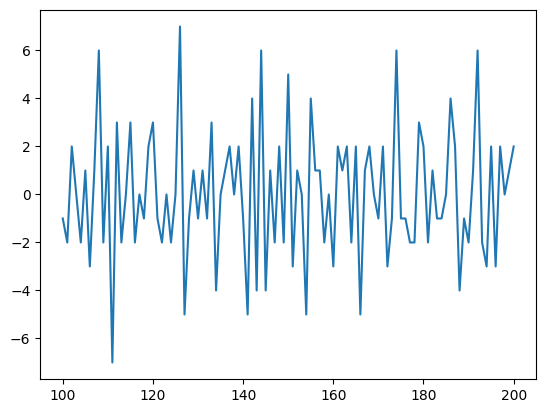

In [18]:
data['detrended_diff_2'].loc[100:200].plot()

In [19]:
# Calculate the rolling mean
window_size = 5  # Choose an appropriate window size
data['RollingMean'] = data[columns[1]].rolling(window=window_size).mean()

# Subtract the rolling mean from the original series
data['detrended_ma'] = data[columns[1]] - data['RollingMean']
# adf_test(data['detrended_ma'].loc[200:10000])
kpss_test(data['detrended_ma'].loc[200:10000])


Results of KPSS Test:
Test Statistic            0.030076
p-value                   0.100000
#Lags Used               46.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\shahb\AppData\Local\Temp\ipykernel_18112\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


In [20]:
degree = 2  # Choose the degree of the polynomial
poly_coeffs = np.polyfit(data.index, data[columns[1]], degree)

# Subtract the polynomial curve from the original series
polynomial_curve = np.polyval(poly_coeffs, data.index)
data['detrended_poly'] = data[columns[1]] - polynomial_curve

kpss_test(data['detrended_poly'].loc[200:10000])

Results of KPSS Test:
Test Statistic            1.601446
p-value                   0.010000
#Lags Used               44.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


C:\Users\shahb\AppData\Local\Temp\ipykernel_18112\3430096599.py:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c')


<Axes: >

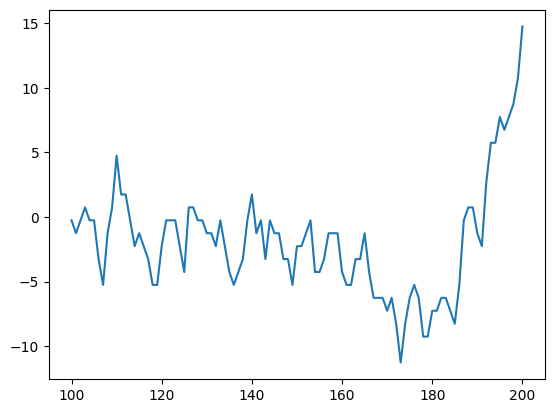

In [21]:
data['detrended_poly'].loc[100:200].plot()

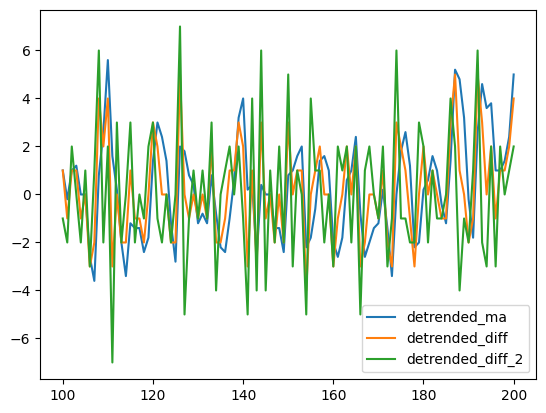

In [22]:
data['detrended_ma'].loc[100:200].plot()
data['detrended_diff'].loc[100:200].plot()
data['detrended_diff_2'].loc[100:200].plot()
plt.legend()


In [23]:
decomposition = seasonal_decompose(data[columns[1]], model='additive', period=24)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

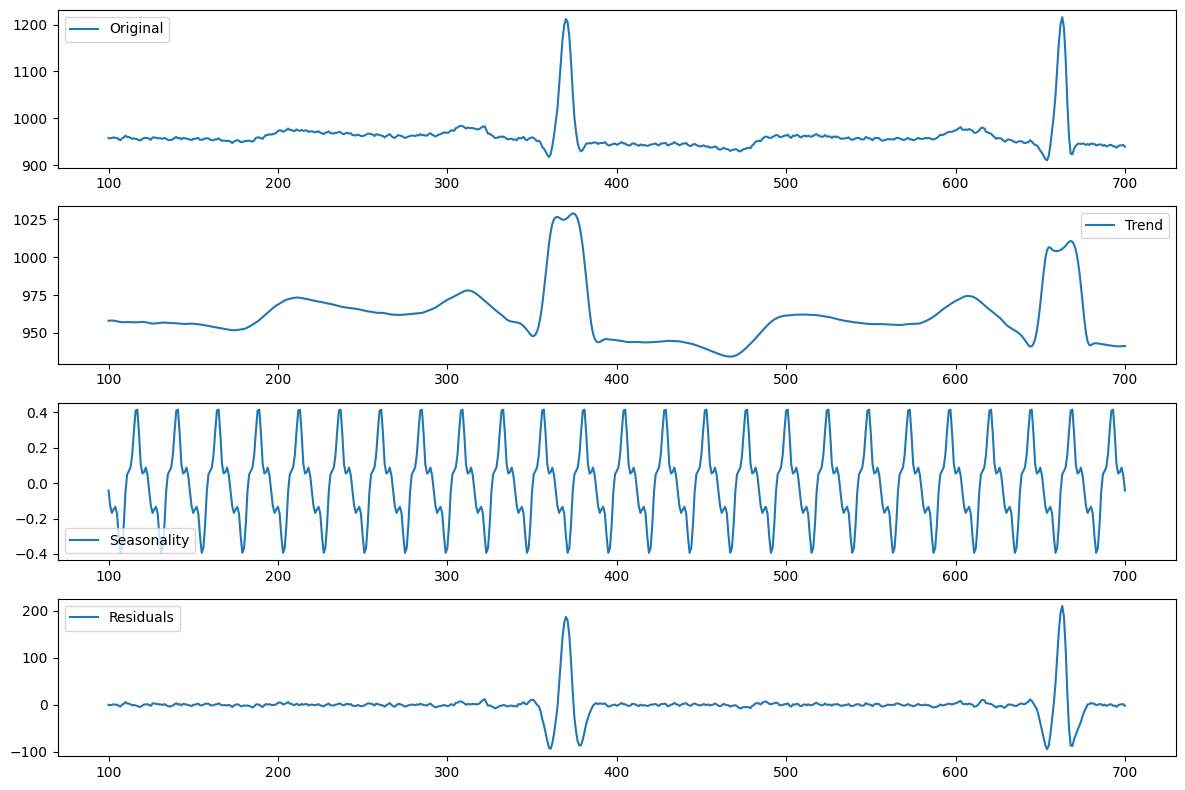

In [24]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
data[columns[1]].loc[100:700].plot(label='Original')
plt.legend(loc='best')
plt.subplot(412)
trend.loc[100:700].plot(label='Trend')
plt.legend(loc='best')
plt.subplot(413)
seasonal.loc[100:700].plot(label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
residual.loc[100:700].plot(label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

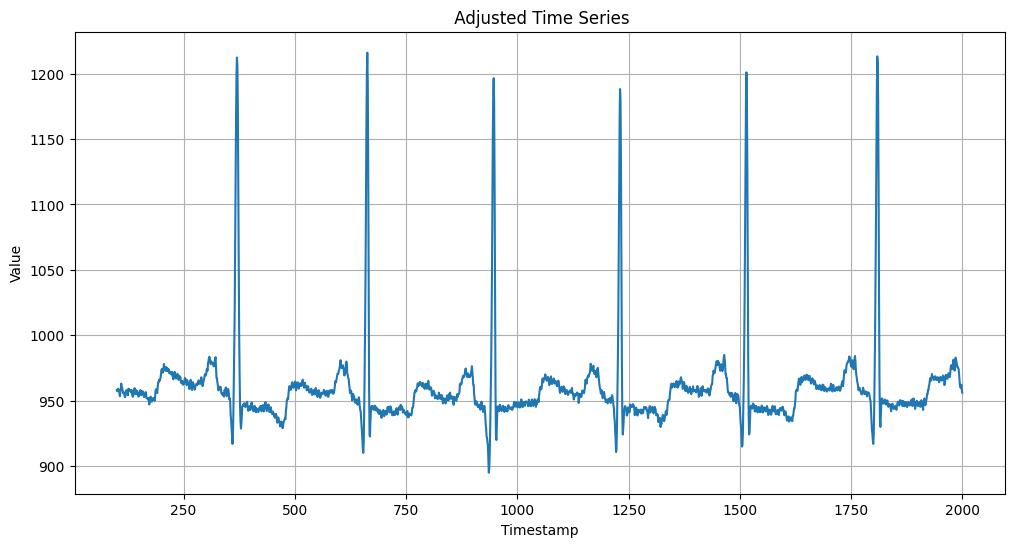

In [32]:
adjusted_series = data[columns[1]] - seasonal
plt.figure(figsize=(12, 6))
adjusted_series.loc[100:2000].plot()
plt.title(' Adjusted Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

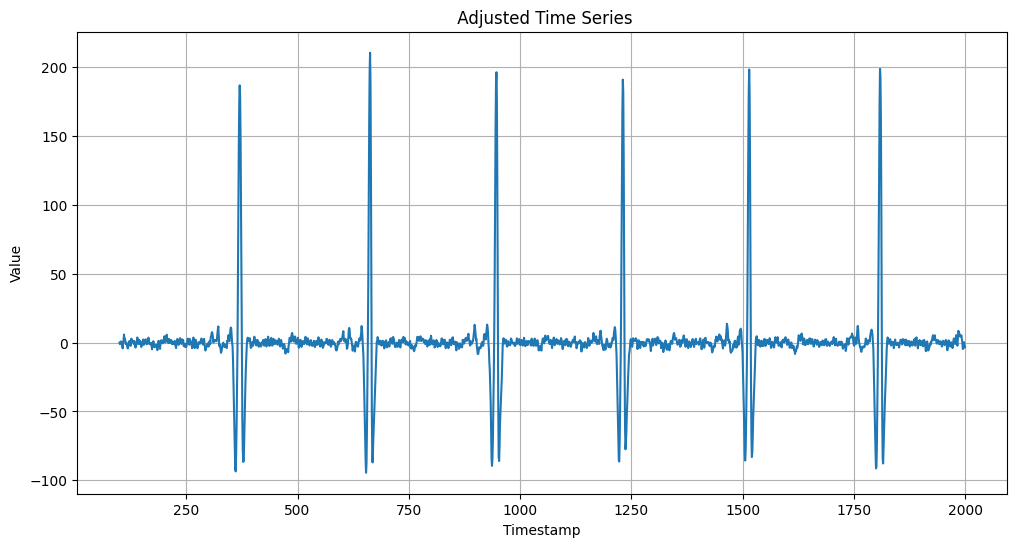

In [33]:
adjusted_series = data[columns[1]] -trend
plt.figure(figsize=(12, 6))
adjusted_series.loc[100:2000].plot()
plt.title(' Adjusted Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

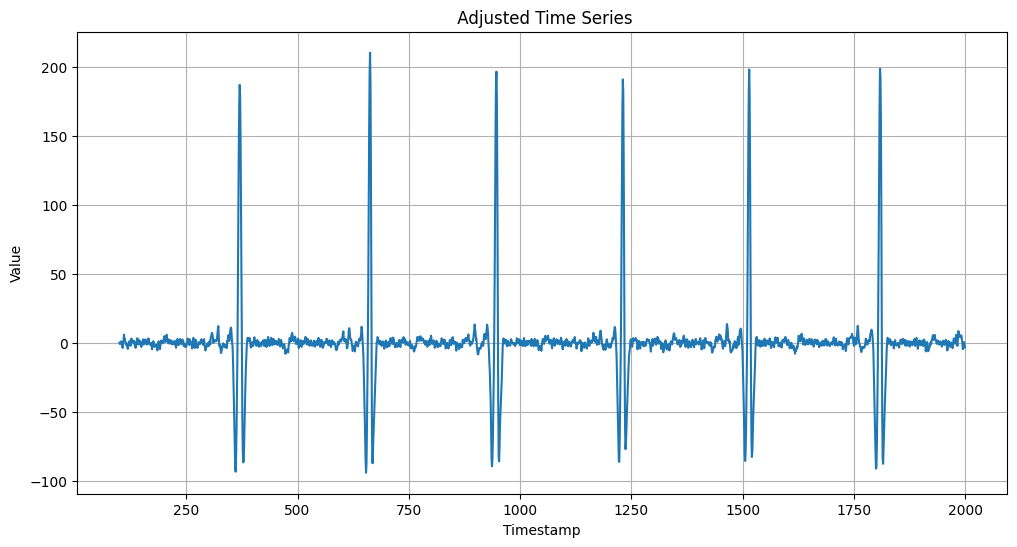

In [31]:
adjusted_series = data[columns[1]] - seasonal-trend
plt.figure(figsize=(12, 6))
adjusted_series.loc[100:2000].plot()
plt.title(' Adjusted Time Series')
plt.xlabel('Timestamp')
plt.ylabel('Value')
# plt.legend()
plt.grid(True)
plt.show()

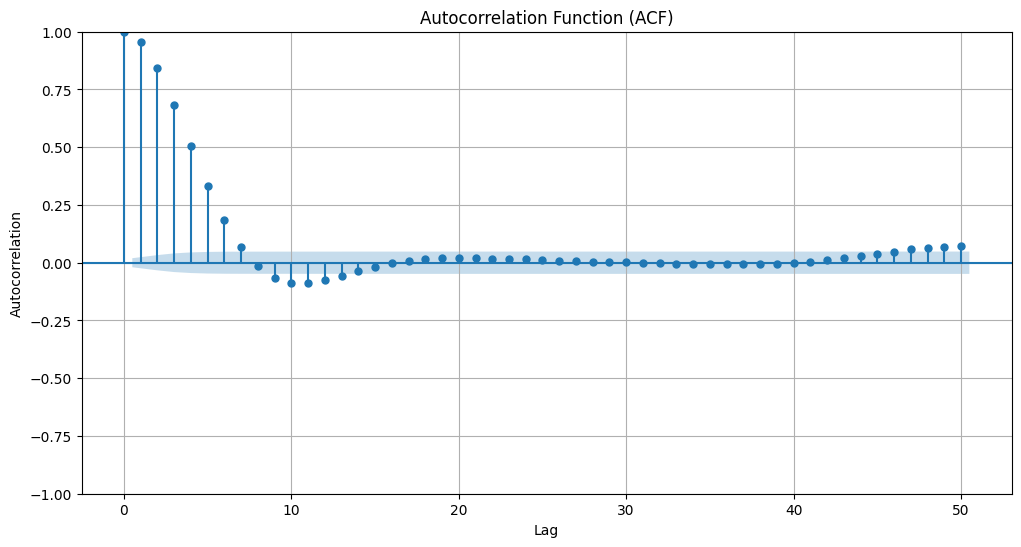

In [26]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(data[columns[1]].loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


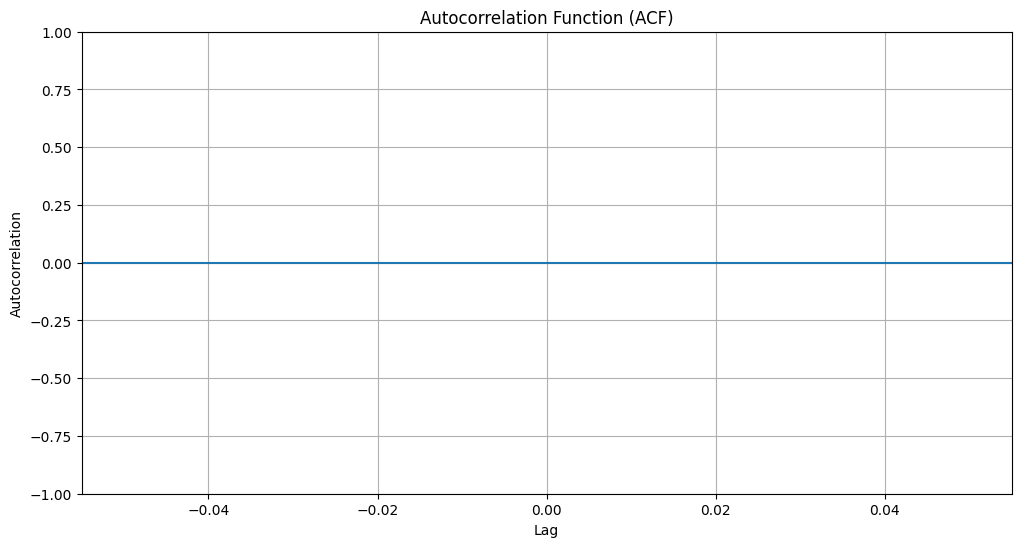

In [30]:
plt.figure(figsize=(12, 6))
plot_acf(data['detrended_diff'].loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


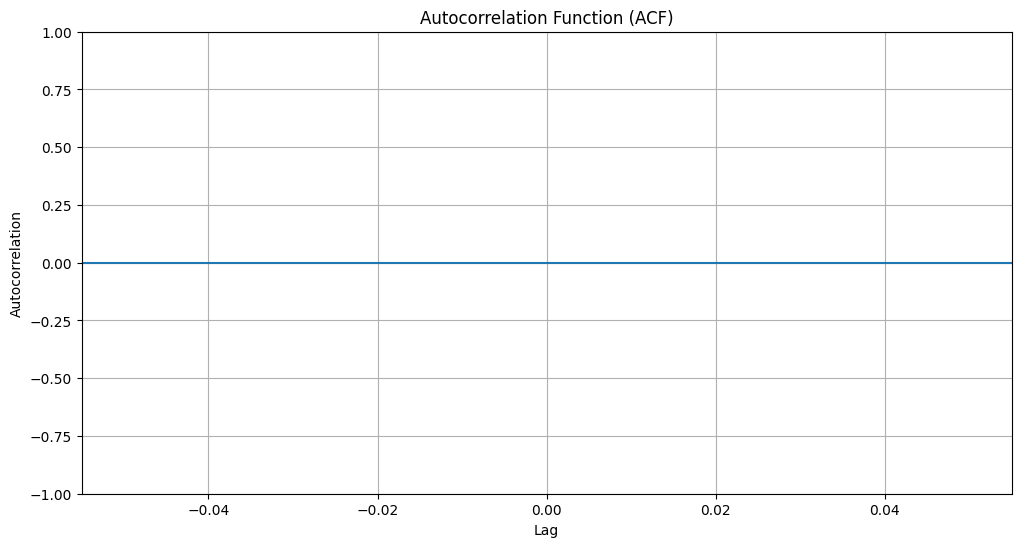

In [29]:
plt.figure(figsize=(12, 6))
plot_acf(data['detrended_diff_2'].loc[0:10000], lags=50, ax=plt.gca())  # Adjust the number of lags as needed
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()


<Figure size 1200x600 with 0 Axes>

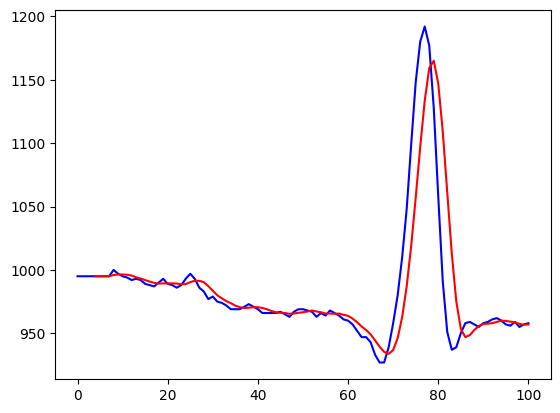

<Figure size 1200x600 with 0 Axes>

In [39]:
moving_avg = data[columns[1]].rolling(window=5).mean()
original = plt.plot(data[columns[1]].loc[0:100], color='blue', label='Original')
moving_avg = plt.plot(moving_avg.loc[0:100], color='red', label='Moving Average')
plt.figure(figsize=(12, 6))